In [57]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

df = pd.read_csv('Radar_Traffic_Counts_Travel_Sensors_LaMar_Manchaca.csv', header = 0,
                        encoding = "utf-16", sep='\t')

# Detect duplicate features
def detect_duplicate_features(df):
    duplicate_features = get_duplicate_features(df)
    duplicate_features.head(10)

    # all the duplicate features as list
    duplicate_features_list = duplicate_features.query("Desc=='Duplicate Values'")['feature2'].to_list()
    print('\nDuplicated features: ', duplicate_features_list)

def detect_constant_features(df):
    constant_features = get_constant_features(df)
    print('\n Constant features')
    print(constant_features)
    
#Convert object Data to datetime64

def convert_Object_Data_DateTime64( feature_name ):
    if df[feature_name].isnull().sum() > 0:
        print(feature_name, ' has ', df[feature_name].isnull().sum())
        print(df[feature_name].mode())
        df[feature_name] = np.where(df[feature_name].isnull(), df[feature_name].mode(), df[feature_name])
        print(df[feature_name].shape)
        print(feature_name, ' has ', df[feature_name].isnull().sum())
    
    df[feature_name] = pd.to_datetime(df[feature_name], infer_datetime_format=True, errors = 'coerce')

    df[feature_name + ' Year'] = df[feature_name].dt.year
    df[feature_name + ' Month'] = df[feature_name].dt.month
    df[feature_name + ' Day'] = df[feature_name].dt.day
    df[feature_name + ' Hour'] = df[feature_name].dt.hour
    df[feature_name + ' Minute'] = df[feature_name].dt.minute


#Remove columns without values
df = df.drop([ 'Corridor Name', 'County', 'Cross St Aka', 'Cross St Segment Id', 'Jurisdiction', 
              'Landmark', 'Location Latitude', 'Location Longitude', 'Primary St Aka', 
              'Primary St Segment Id', 'Reader Id'], axis=1) 

#Detect duplicate features
detect_duplicate_features(df)

#Delete duplicate feature Kits Id1
df = df.drop(['Kits Id1'], axis=1) 

#Detect constant features
detect_constant_features(df)

#Remove constant features
df = df.drop(['Atd Location Id', 'Location Type', 'Primary St Block', 'Cross St Block', 
             'Turn On Date', 'Source DB ID', 'Signal Eng Area', 'Sensor Type', 'Sensor Status', 
              'Sensor Mfg', 'Primary St Segment Display Name', 'Primary St', 'Modified Date', 
              'Location Name', 'Atd Sensor Id', 'Location', 'Kits Id', 'Jurisdiction Label', 
              'Ip Comm Status', 'Intersection Name', 'Cross St Segment Display Name', 'Cross St',
              'Council District', 'Comm Status Datetime Utc', 'Coa Intersection Id', 'Speed Limit'], axis=1) 


convert_Object_Data_DateTime64('Read Date')

#Remove Date features and unique identifier
df = df.drop(['Read Date', 'Time Bin', 'Row ID'], axis=1)



Duplicated features:  ['Kits Id1']

 Constant features
        Desc                              Var                         Value  \
0   Constant                  Atd Location Id                  LOC17-010435   
1   Constant                    Atd Sensor Id                           160   
2   Constant                 Primary St Block                          2800   
3   Constant                   Cross St Block                          2801   
4   Constant                     Turn On Date  05/05/2013 05:00:00 AM +0000   
5   Constant                     Source DB ID      595a74203048bf4b5388ba58   
6   Constant                  Signal Eng Area                     SOUTHWEST   
7   Constant                      Sensor Type                         RADAR   
8   Constant                    Sensor Status                     TURNED_ON   
9   Constant                       Sensor Mfg                    Wavetronix   
10  Constant  Primary St Segment Display Name        S LAMAR BLVD (2023812)

In [115]:
print('Headers: ', df.columns.values)
npdata = df.to_numpy()
Data = npdata[:, :-1] #Getting data
Labels = npdata[:,-1].astype(int) # Getting labels
print('\nDir. NB', Data[Data[:,4] == 'SB_out'].shape)

Headers:  ['Day' 'Day of Week' 'Detector ID' 'Direction' 'Lane' 'Month'
 'Speed Validity' 'Year' 'Hour' 'Minute' 'Occupancy' 'Speed' 'Volume'
 'Read Date Year' 'Read Date Month' 'Read Date Day' 'Read Date Hour'
 'Read Date Minute']

Dir. NB (109475, 17)


In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df = pd.get_dummies(df, columns=['Direction', 'Lane'], 
                       prefix=['Direction', 'Lane'])


features_name = ['Day', 'Day of Week', 'Detector ID', 'Month', 'Year', 'Hour', 'Minute',
 'Occupancy', 'Speed', 'Volume', 'Read Date Year', 'Read Date Month',
 'Read Date Day', 'Read Date Hour', 'Read Date Minute', 'Direction_NB',
 'Direction_SB', 'Lane_NB_in', 'Lane_NB_out', 'Lane_SB_in', 'Lane_SB_out']

cols = list(df.columns.values)
df = df[cols[0:4] + cols[5:] + [cols[4]]]
print('Headers: ', df.columns.values)
print(df.head())
print(df.shape)

npdata = df.to_numpy()
Data = npdata[:, :-1] #Getting data
Labels = npdata[:,-1].astype(int) # Getting labels

print('Higher speed:', len(Data[Labels ==0]))
print('Lower speed:', len(Data[Labels ==1]))

# define feature selection
fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(Data, Labels)
names = fs.get_feature_names_out(features_name)
print('\n Selected features')
print(names)
print(X_selected[0:10])


Headers:  ['Day' 'Day of Week' 'Detector ID' 'Month' 'Year' 'Hour' 'Minute'
 'Occupancy' 'Speed' 'Volume' 'Read Date Year' 'Read Date Month'
 'Read Date Day' 'Read Date Hour' 'Read Date Minute' 'Direction_NB'
 'Direction_SB' 'Lane_NB_in' 'Lane_NB_out' 'Lane_SB_in' 'Lane_SB_out'
 'Speed Validity']
   Day  Day of Week  Detector ID  Month  Year  Hour  Minute  Occupancy  Speed  \
0   16            0            2      7  2017     0       0          2     24   
1   23            0            2      7  2017     0       0          2     28   
2   16            0            2      7  2017     0      15          1     24   
3   23            0            2      7  2017     0      15          2     30   
4   16            0            2      7  2017     0      30          1     27   

   Volume  ...  Read Date Day  Read Date Hour  Read Date Minute  Direction_NB  \
0      26  ...             16               5                 0             1   
1      33  ...             23               5        

cData:  (437900, 2)
cData year:  (58200, 2)


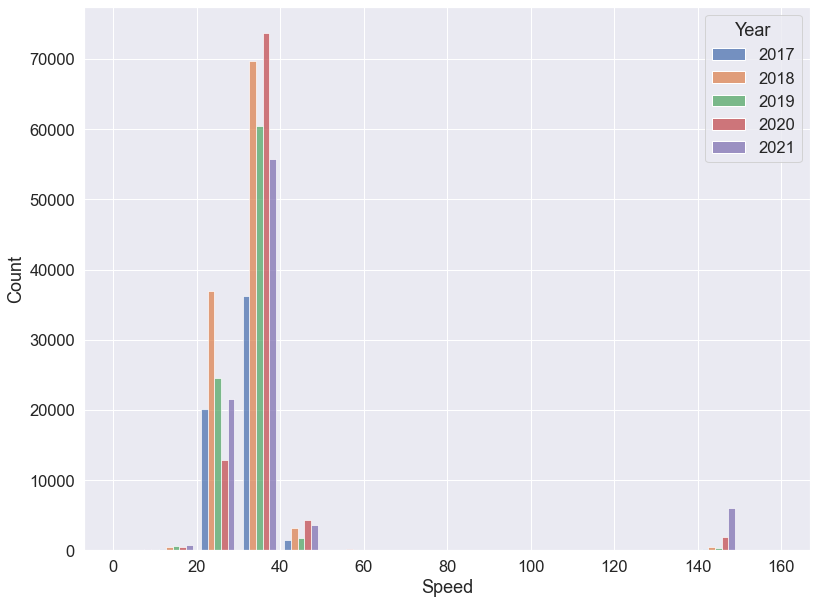

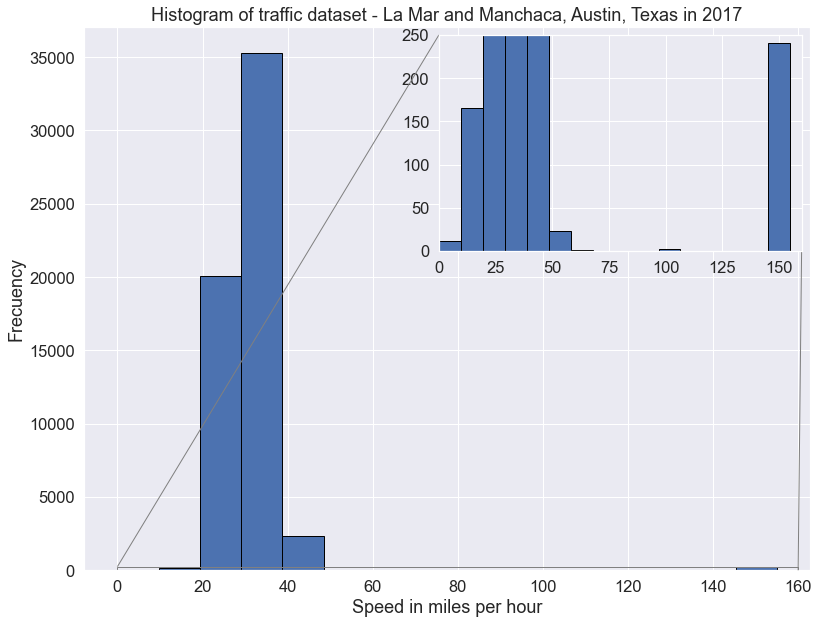

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(13,10)}, font_scale=1.5)


# 45-year y 8-speed

def create_hist_years(Data_frame):  
    sns.histplot(data=Data_frame, x="Speed", hue="Year", multiple="dodge", shrink=.8, 
                 binwidth=10, palette=sns.color_palette('deep', n_colors=5))

def create_histogram(Data, year, xlim1, xlim2, ylim2, zoom: bool):
    print('cData: ', Data.shape)
    Data_year = Data [Data[:, 0].astype(float) == year]
    #uniq = np.unique(Data_year)
    print('cData year: ', Data_year.shape)

    Data_year = Data_year[:, 1].astype(int)
  
    fig, ax = plt.subplots()
    plt.hist(Data_year, bins=16, edgecolor='black', linewidth=1)#Initial bins 5
    plt.title('Histogram of traffic dataset - La Mar and Manchaca, Austin, Texas in {0}'.format(year))
    plt.xlabel('Speed in miles per hour')
    plt.ylabel('Frecuency')

    if zoom:
        
        axins = inset_axes(ax,
                           width="50%", # width = 30% of parent_bbox
                           height=3., # height : 1 inch
                           loc=1)
        axins.hist(Data_year, bins = 16, edgecolor='black', linewidth=1)
        axins.set_xlim(xlim1, xlim2)
        axins.set_ylim(0, ylim2)
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

df_hist = df[['Year','Speed']]

Data_hist = df_hist.to_numpy() #Getting data

create_hist_years(df_hist)
#Creating histogram for traffic in 2017
create_histogram(Data_hist, 2017, 0, 160, 250, True)


Headers:  ['Day' 'Day of Week' 'Detector ID' 'Month' 'Year' 'Hour' 'Minute'
 'Occupancy' 'Speed' 'Volume' 'Read Date Year' 'Read Date Month'
 'Read Date Day' 'Read Date Hour' 'Read Date Minute' 'Direction_NB'
 'Direction_SB' 'Lane_NB_in' 'Lane_NB_out' 'Lane_SB_in' 'Lane_SB_out'
 'Speed Validity']
Higher speed: 18186
Lower speed: 419714
Cars exceeded speed limit:  18186


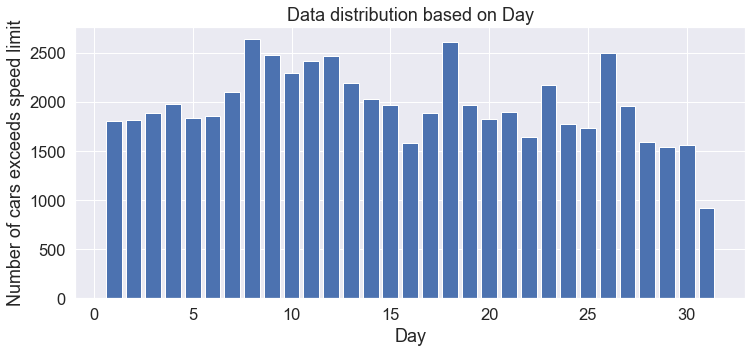

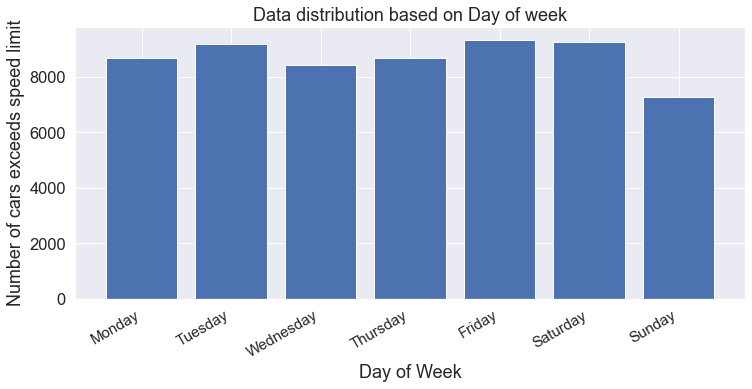

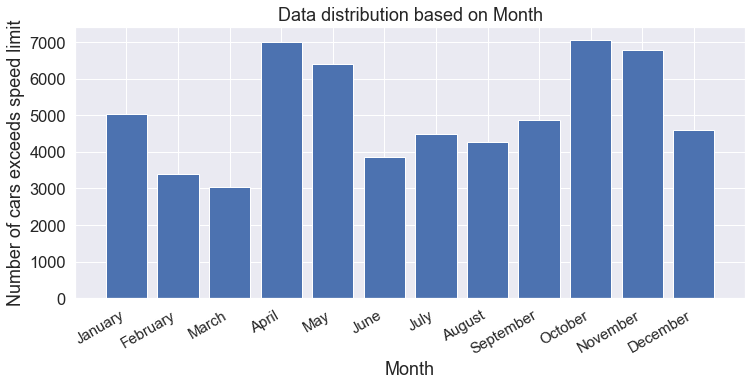

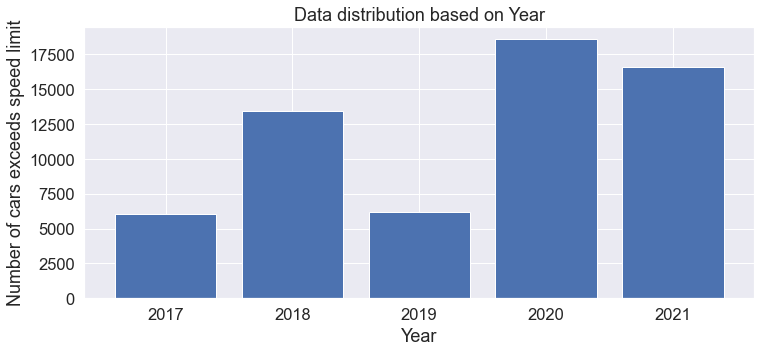

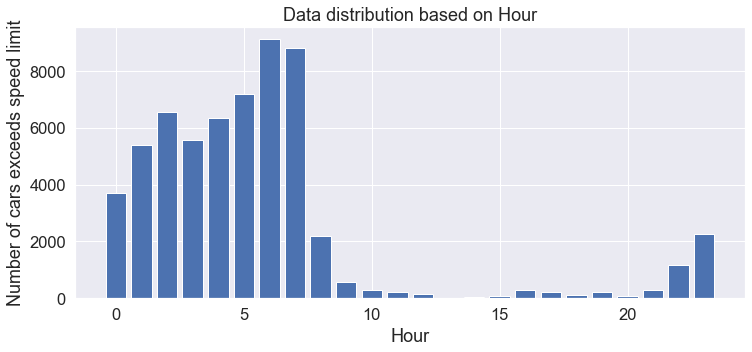

In [13]:
from chardet.universaldetector import UniversalDetector
from datetime import date, datetime
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import sys
from calendar import monthrange
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import PowerTransformer

def generate_bins_spd_vlm(n_bins, volumes, speeds):
    #Define right number of bins
    min_value = np.amin(speeds)
    max_value = np.amax(speeds)
    last_value = max_value
    step = round((max_value-min_value)/n_bins)
    
    bins_volume = np.zeros(n_bins)
    bins_speed = np.empty(n_bins, dtype=object)
    eval_max = False
    for i in range(n_bins):
        max_value = min_value+step
        eval_max = speeds<max_value
        if (i == n_bins-1):
            max_value = last_value
            eval_max = speeds<=max_value
        mask = np.logical_and(speeds>=min_value, eval_max)
        bins_speed[i] = str(min_value) + ' - ' + str(max_value)
        min_value = max_value
        bins_volume[i] = np.sum(volumes[mask])
    bins_volume = bins_volume.astype(int)
    return bins_speed, bins_volume

def generate_bins_catvar_vlm(volumes, catvar):
    #Define right number of bins
    min_value = np.amin(catvar)
    max_value = np.amax(catvar)
    n_bins = len(np.unique(catvar))
    
    bins_volume = np.zeros(n_bins)
    bins_catvar = np.sort(np.unique(catvar))

    for i in range(n_bins):      
        bins_volume[i] = np.sum(volumes[catvar == bins_catvar[i]])
    bins_volume = bins_volume.astype(int)
    return bins_catvar, bins_volume

def plot_histogram_spd_vlm(n_bins, volumes, speeds):
    plt.figure(figsize=(12, 5))
    bins_speed, bins_volume = generate_bins_spd_vlm(n_bins, volumes, speeds)
    plt.bar(bins_speed, bins_volume)
    plt.title('Histogram Speed') 
    plt.xticks(fontsize='small', ha='right', rotation='vertical')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Number of cars')
    plt.show()

def plot_histogram_catvar_vlm(volumes, catvar, title, xlabel, xticks_labels):
    plt.figure(figsize=(12, 5))
    bins_catvar, bins_volume = generate_bins_catvar_vlm(volumes, catvar)
    plt.bar(bins_catvar, bins_volume)
    plt.title(title) 
    if len(xticks_labels):
        plt.xticks(bins_catvar, xticks_labels, fontsize='small', ha='right', rotation='30')
    plt.xlabel(xlabel)
    plt.ylabel('Number of cars exceeds speed limit')
    plt.show()

req_cols = ['Day', 'Day of Week', 'Intersection Name', 'Month', 'Speed Validity',
       'Year', 'Hour', 'Speed', 'Volume']

N, n = Data.shape

target_names = np.unique(Labels)

print('Headers: ', df.columns.values)
#print('Memory info: ', df.info(memory_usage='deep'))

n_bins = 50
x_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_months = ['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December']
col_hour = 5
col_speed = 8
col_volumen = 9

#plot_histogram_spd_vlm(n_bins, Data[:,7], Data[:,6])

Data_pos_class = Data[Labels ==0]#Select records that refer cars which exceeded speed limit. 0 Exceeds speed limit - Positive class
print('Higher speed:', len(Data[Labels ==0]))
print('Lower speed:', len(Data[Labels ==1]))
print('Cars exceeded speed limit: ', len(Data_pos_class))
plot_histogram_catvar_vlm(Data_pos_class[: ,col_volumen], Data_pos_class[:,0], 'Data distribution based on Day', 'Day', [])
plot_histogram_catvar_vlm(Data_pos_class[:,col_volumen], Data_pos_class[:,1], 'Data distribution based on Day of week', 'Day of Week', x_days)
plot_histogram_catvar_vlm(Data_pos_class[:,col_volumen], Data_pos_class[:,3], 'Data distribution based on Month', 'Month',x_months)
plot_histogram_catvar_vlm(Data_pos_class[:,col_volumen], Data_pos_class[:,4], 'Data distribution based on Year', 'Year',[])
plot_histogram_catvar_vlm(Data_pos_class[:,col_volumen], Data_pos_class[:,col_hour], 'Data distribution based on Hour', 'Hour',[])


               Speed         Volume
count  437900.000000  437900.000000
mean       34.134234      69.135995
std        17.040826      54.084732
min         0.000000       0.000000
25%        29.000000      13.000000
50%        32.000000      68.000000
75%        34.000000     116.000000
max       155.000000     255.000000


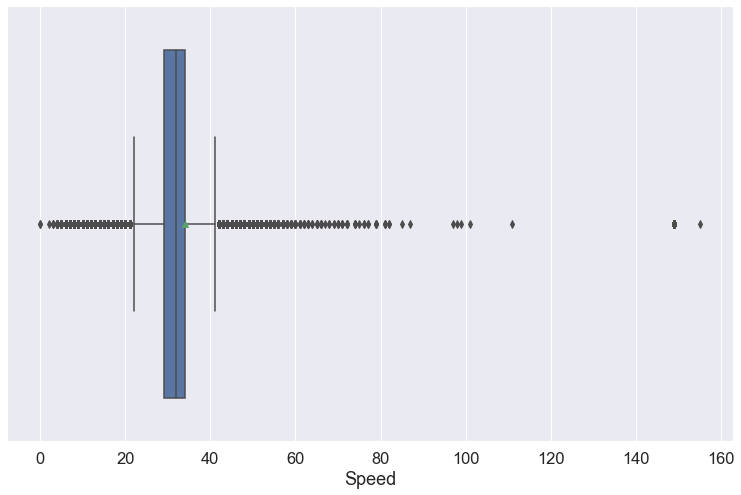

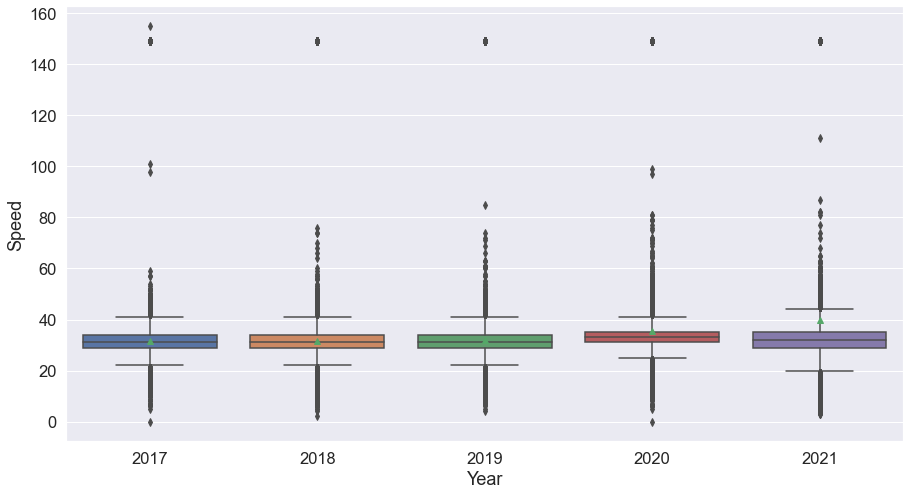


                Speed           Year
count  437900.000000  437900.000000
mean       34.134234    2019.096278
std        17.040826       1.338651
min         0.000000    2017.000000
25%        29.000000    2018.000000
50%        32.000000    2019.000000
75%        34.000000    2020.000000
max       155.000000    2021.000000


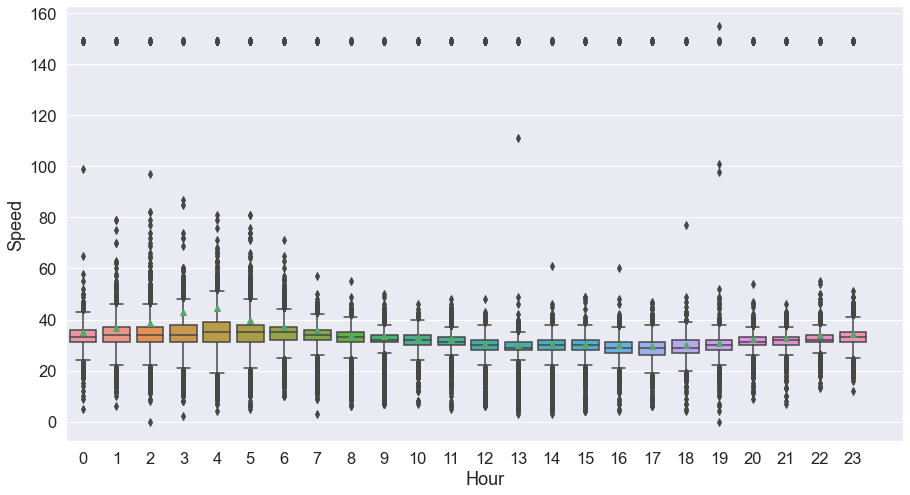


                Speed           Hour
count  437900.000000  437900.000000
mean       34.134234      11.509157
std        17.040826       6.908783
min         0.000000       0.000000
25%        29.000000       6.000000
50%        32.000000      12.000000
75%        34.000000      17.000000
max       155.000000      23.000000


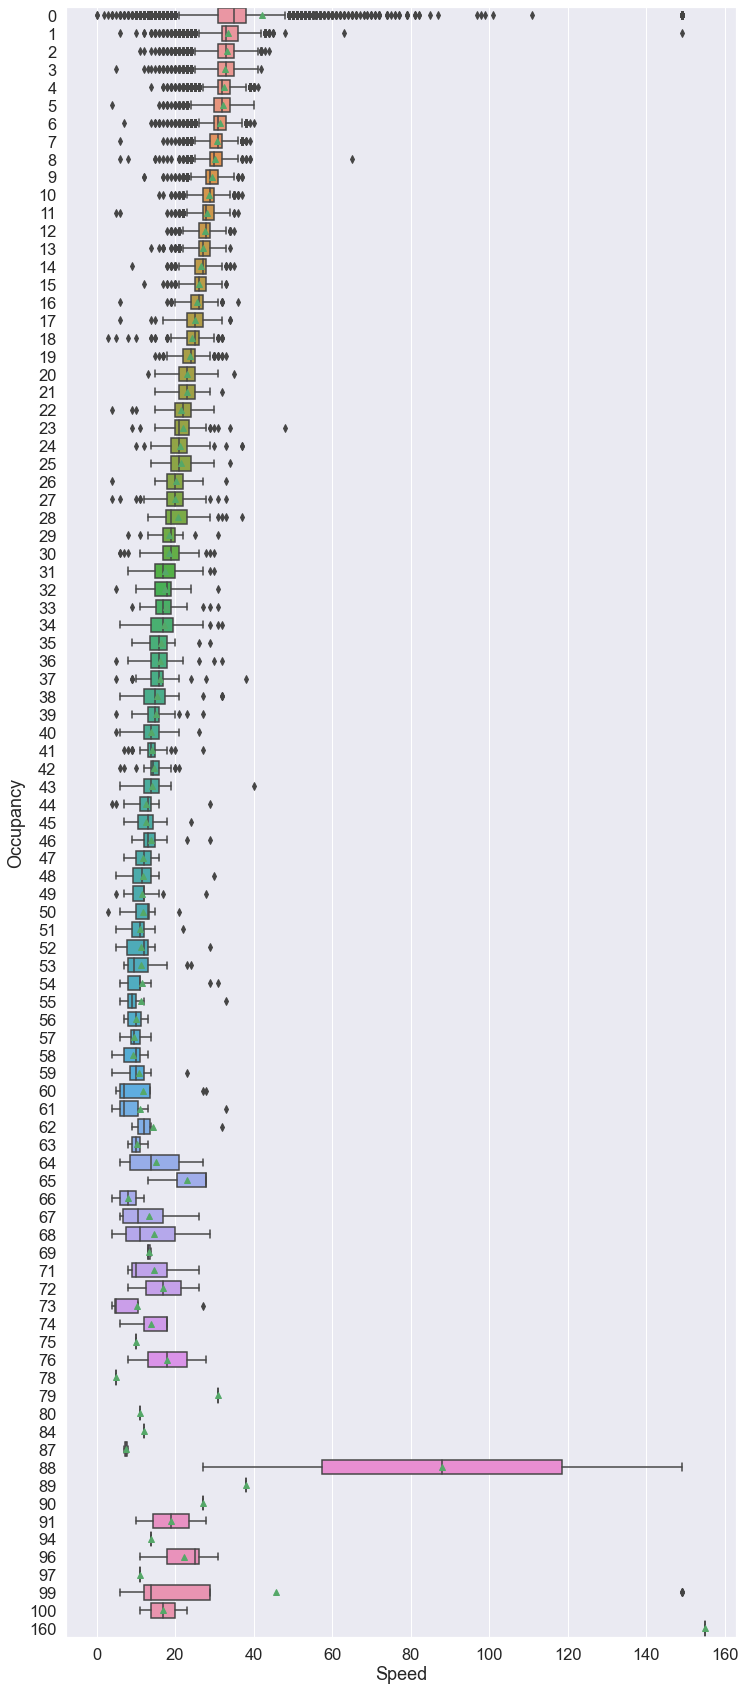


                Speed      Occupancy
count  437900.000000  437900.000000
mean       34.134234       4.545204
std        17.040826       4.801552
min         0.000000       0.000000
25%        29.000000       0.000000
50%        32.000000       4.000000
75%        34.000000       7.000000
max       155.000000     160.000000


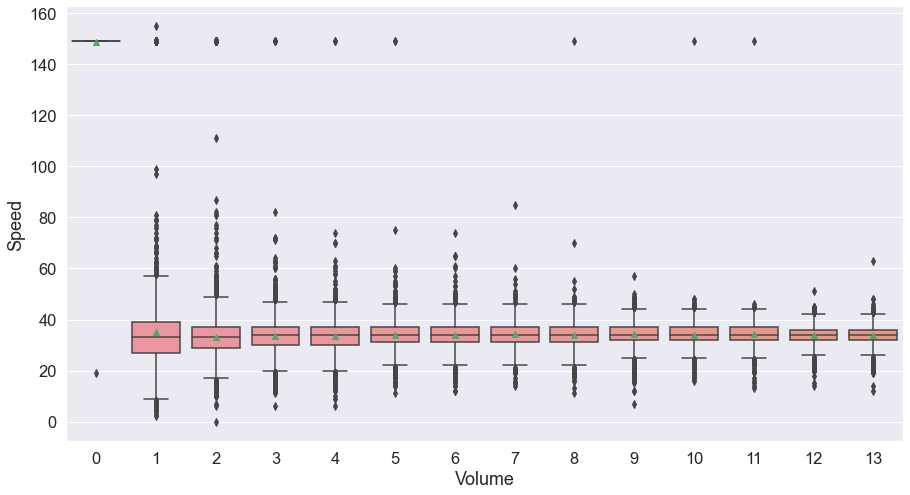


                Speed         Volume
count  437900.000000  437900.000000
mean       34.134234      69.135995
std        17.040826      54.084732
min         0.000000       0.000000
25%        29.000000      13.000000
50%        32.000000      68.000000
75%        34.000000     116.000000
max       155.000000     255.000000


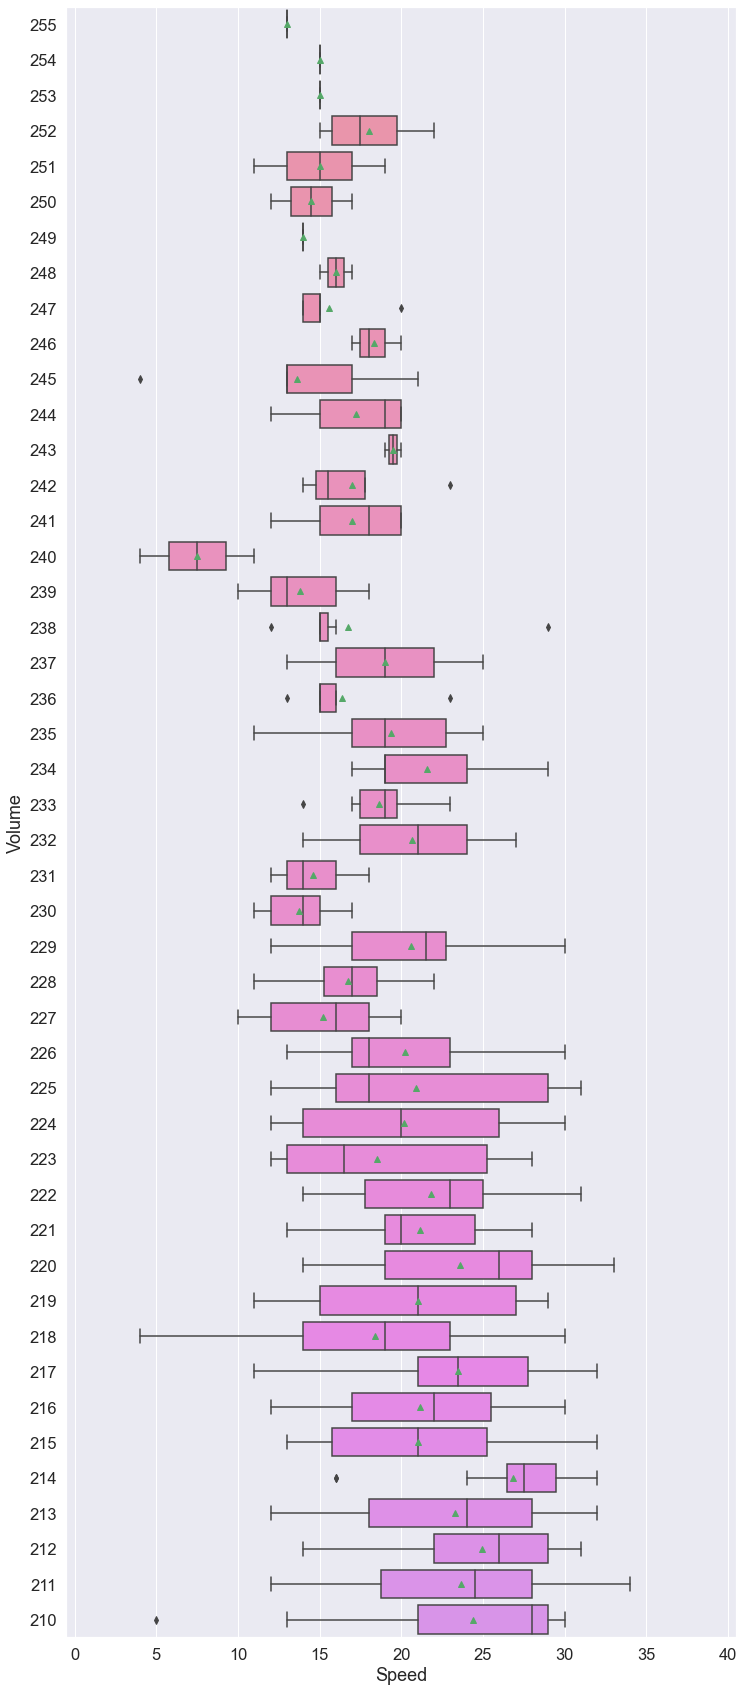


                Speed         Volume
count  437900.000000  437900.000000
mean       34.134234      69.135995
std        17.040826      54.084732
min         0.000000       0.000000
25%        29.000000      13.000000
50%        32.000000      68.000000
75%        34.000000     116.000000
max       155.000000     255.000000
(45, 2)
m =  -2.543511990978919
c =  279.18364512030075

Correlation coefficient=  -0.74


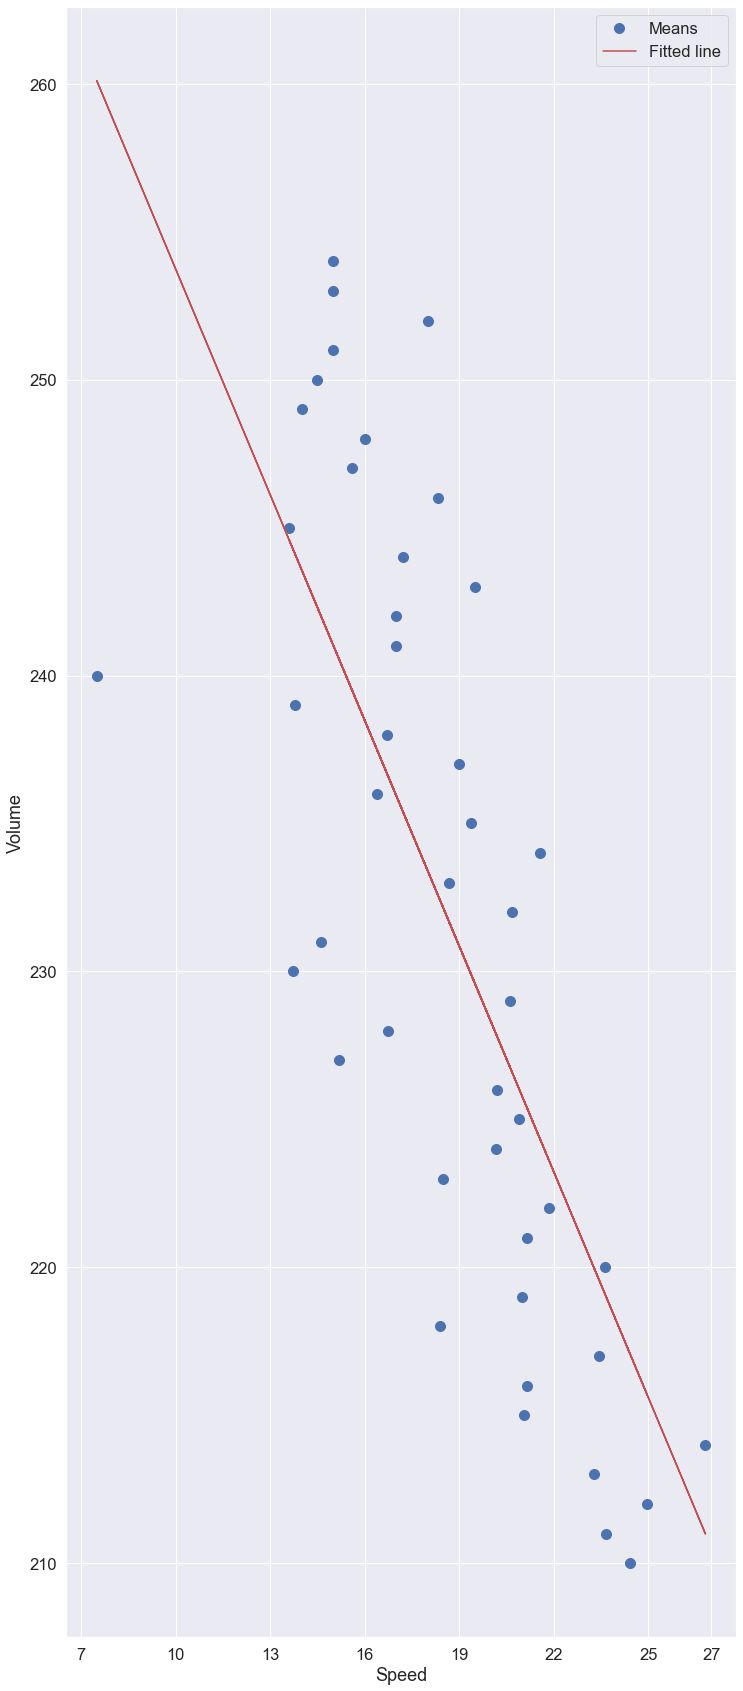

In [44]:
import seaborn as sns
import ssl
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(13,8)}, font_scale=1.5)

def draw_boxplot_speed():
    ax = sns.boxplot(x=df["Speed"], showmeans=True)
    new_df = pd.DataFrame(data=df, columns=["Speed", "Volume"])
    #print(len(new_df))
    print(new_df.describe())
    plt.show()
    
def draw_boxplot(cat_name, min_value, max_value, orientation,  cat_labels):  
    if orientation == 'h':
        sns.set(rc={'figure.figsize':(12,30)}, font_scale=1.5)#15,50
        ax = sns.boxplot(y=cat_name, x="Speed", data=df, showmeans=True, orient= orientation)
        if cat_name != 'Occupancy':         
            ax.set(ylim=(min_value-0.5, max_value + 0.5))
            ax.set(xlim=(-0.5, 40.5))
    else:
        sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5)
        ax = sns.boxplot(x=cat_name, y="Speed", data=df, showmeans=True, orient= orientation)
        if cat_name != 'Year':
            ax.set(xlim=(min_value-0.5, max_value + 0.5))
    if len(cat_labels) > 0:
        ax.set_xticklabels(cat_labels)
    
    plt.show()    
    new_df = pd.DataFrame(data=df, columns=["Speed", cat_name])
    print('\n', new_df.describe())
    
    #Statistics per feature value
    writer = pd.ExcelWriter("my_description.xlsx", engine = 'xlsxwriter')
    np_tmp_df = np.zeros((1, 2))
    
    for i in range(min_value,max_value):
        temp_df = new_df[(new_df[cat_name] == i)]
        temp_df.describe().to_excel(writer,
             sheet_name=cat_name + str(i))  
        it_mean =  temp_df.describe().to_numpy()[1,:].reshape((-1,2))

        np_tmp_df = np.vstack((np_tmp_df, it_mean))
        #print('\n', temp_df.describe().to_csv("my_description.csv"))
    writer.save()

    return np_tmp_df[1:]

def calculate_least_sq(arr_means):
    print(arr_means.shape)
    n_rows, _ = arr_means.shape
    x = arr_means[:, 0]
    y = arr_means[:, 1]
    A = np.vstack([x, np.ones(n_rows)]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    corr_coef = np.corrcoef(x, y)[0,1]
    
    print('m = ', m)
    print('c = ', c)
    print('\nCorrelation coefficient= ', round(corr_coef,2))
    
    xticks = [7,10,13,16,19,22,25,27]
    plt.plot(x, y, 'o', label='Means', markersize=10)
    plt.plot(x, m*x + c, 'r', label='Fitted line')
    plt.xlabel('Speed')
    plt.ylabel('Volume')
    plt.xticks(xticks)
    plt.legend()
    plt.show()

#print('Headers: ', df.columns.values)
#Draw boxplot of speed
draw_boxplot_speed()
cat_values = range(2017,2022)
draw_boxplot("Year", 2017, 2022, 'v', [])
draw_boxplot("Hour", 0, 24, 'v', [])
draw_boxplot("Occupancy", 0, 161, 'h', [])
draw_boxplot("Volume", 0, 13, 'v', [])
arr_means = draw_boxplot("Volume", 210, 255, 'h', [])
calculate_least_sq(arr_means)


['Day' 'Day of Week' 'Detector ID' 'Month' 'Year' 'Hour' 'Minute'
 'Occupancy' 'Speed' 'Volume' 'Read Date Year' 'Read Date Month'
 'Read Date Day' 'Read Date Hour' 'Read Date Minute' 'Direction_NB'
 'Direction_SB' 'Lane_NB_in' 'Lane_NB_out' 'Lane_SB_in' 'Lane_SB_out'
 'Speed Validity']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


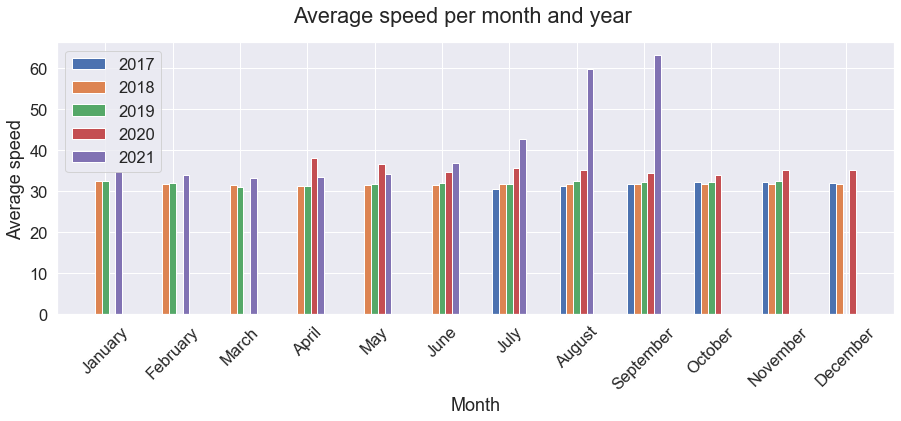

In [45]:
#(a) Plotting distribution per MONTH

sns.set(font_scale=1.5)

def get_avg_val_month(Data_year, n_months):
    avg_val = np.zeros(n_months)
    for i in range(n_months):
        speed_val = Data_year[Data_year[:, 0].astype(int) == i+1]
        avg_val[i] = np.average(speed_val[:, 1])
    return avg_val


def get_avg_val_day_month(Data_year, year, month):
    num_days = monthrange(year, month)[1] # Number of days per month
    avg_val = np.zeros(num_days)
    for i in range(num_days):
        speed_val = Data_year[Data_year[:, 11].astype(int) == i+1]
        avg_val[i] = np.average(speed_val[:, 50])
    return avg_val

def draw_bar_chart_month_year(Data, x_months):
    n_months = len(x_months) # Number of months
    years = np.unique(Data[:, col_year])#Getting the years
    n_years = len(years) #Number of years
    k = 0.1 #Bar width
    init_val = - 0.2
    
    X_axis = np.arange(n_months)
    avg_month = np.zeros((n_years, n_months))

    for i in range(n_years):
        Speed_month = Data [Data[:, col_year].astype(float) == years[i]]
        Speed_month = Speed_month[:, [col_month, col_speed]]
        #print('Speed_month: ', Speed_month[0:3])
        avg_month[i] = get_avg_val_month(Speed_month, n_months)

    
    #Drawing bar chart
    plt.figure(figsize=(15, 5))
    for i in range(n_years):    
        plt.bar(X_axis + init_val + k * i, avg_month[i], 0.1, label = years[i])
    
    plt.xticks(X_axis, x_months, rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Average speed")
    plt.legend(loc='upper left')
    plt.suptitle('Average speed per month and year')
    plt.show()

def draw_line_chart(Data, x_values):
    n = len(x_values) # Number of months
    avg_val_2017 = np.zeros(n)

    X_axis = np.arange(n)
    Data_2017 = Data [Data[:, 44].astype(float) == 2017]

col_year = 4
col_speed = 8
col_month = 3

x_months = ['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December']
print(df.columns.values)
Data = df.to_numpy()
draw_bar_chart_month_year(Data, x_months)

###### 

In [46]:
#(b) Plotting distributions per LOCATION

def get_avg_val_loc(Data_year, x_locations, n_loc):
    avg_val = np.zeros(n_loc)
    for i in range(n_loc):
        speed_val = Data_year[Data_year[:, 0].astype(str) == x_locations[i]]
        avg_val[i] = np.average(speed_val[:, 1])
    return avg_val
    
def draw_bar_chart_location(Data):
    x_locations = np.unique(Data[:, 15])#Getting the locations
    years = np.unique(Data[:, col_year])#Getting the years
    n_years = len(years) #Number of years
    n_loc = len(x_locations) # Number of locations
    X_axis = np.arange(n_loc)

    avg_loc = np.zeros((n_years, n_loc))
    k = 0.1 #Bar width
    init_val = - 0.2

    for i in range(n_years):
        Speed_loc = Data [Data[:, col_year].astype(float) == years[i]]
        Speed_loc = Speed_loc[:, [15, col_speed]]
        avg_loc[i] = get_avg_val_loc(Speed_loc, x_locations, n_loc)
    
    #Drawing bar chart
    plt.figure(figsize=(12, 5))
    for i in range(n_years):    
        plt.bar(X_axis + init_val + k * i, avg_loc[i], 0.1, label = years[i])

    plt.xticks(X_axis, x_locations, fontsize='x-small', ha='right', rotation=30)
    plt.xlabel("Location")
    plt.ylabel("Average speed")
    plt.legend(loc='upper left')
    plt.suptitle('Average speed per location and year')
    plt.show()
#draw_bar_chart_location(Data)


 len data:  437900


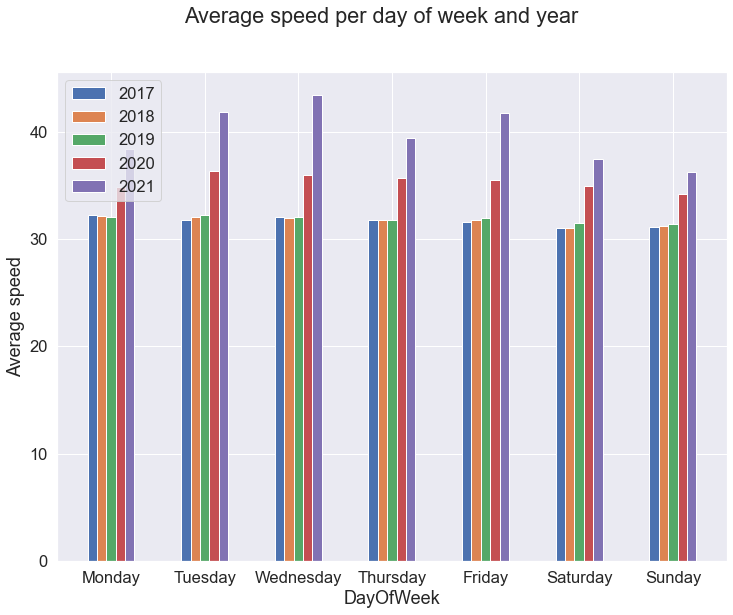

In [61]:
#(c) Plotting distributions per DAYOFWEEK
sns.set(font_scale=1.5)

def get_avg_val_day(Data_year, n_days):
    avg_val = np.zeros(n_days)
    for i in range(n_days):
        speed_val = Data_year[Data_year[:, 0].astype(int) == i]
        avg_val[i] = np.average(speed_val[:, 1])
    return avg_val
    
def draw_bar_chart_day(Data, x_days):
    years = np.unique(Data[:, col_year])#Getting the years
    n_years = len(years) #Number of years
    n_days = len(x_days) # Number of days
    X_axis = np.arange(n_days)

    avg_day = np.zeros((n_years, n_days))
    k = 0.1 #Bar width
    init_val = - 0.2

    for i in range(n_years):
        Speed_day = Data [Data[:, col_year].astype(float) == years[i]]
        Speed_day = Speed_day[:, [col_day_week, col_speed]]
        avg_day[i] = get_avg_val_day(Speed_day, n_days)

    
    #Drawing bar chart
    plt.figure(figsize=(12, 9))
    for i in range(n_years):    
        plt.bar(X_axis + init_val + k * i, avg_day[i], 0.1, label = years[i])

    plt.xticks(X_axis, x_days)
    plt.xlabel("DayOfWeek")
    plt.ylabel("Average speed")
    plt.legend(loc='upper left')
    plt.suptitle('Average speed per day of week and year')
    plt.show()
    
col_day_week = 1
x_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(' len data: ', len(Data))
draw_bar_chart_day(Data, x_days)

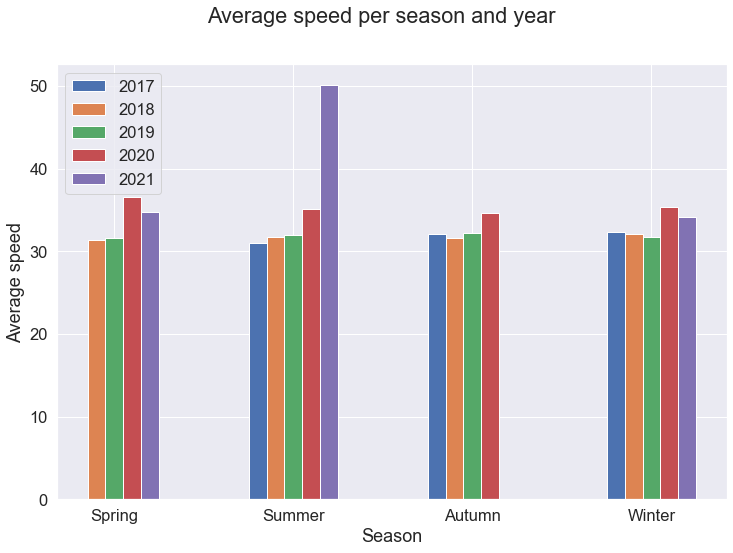

In [47]:
#(d) Plotting distributions by SEASON
from datetime import date, datetime

sns.set(font_scale=1.5)

def_year = 2020 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('Winter', (date(def_year,  1,  1),  date(def_year,  3, 19))),
           ('Spring', (date(def_year,  3, 20),  date(def_year,  6, 20))),
           ('Summer', (date(def_year,  6, 21),  date(def_year,  9, 22))),
           ('Autumn', (date(def_year,  9, 23),  date(def_year, 12, 20))),
           ('Winter', (date(def_year, 12, 21),  date(def_year, 12, 31)))]

#Getting season by Date input
def get_season_by_Day_Month(day, month):
    import datetime
    
    season = None
    if is_correct_date(day, month, def_year):
        season = get_season_by_Date(datetime.datetime(def_year, month, day))
    return season
    
def get_season_by_Date(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=def_year)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

#print(get_season(date.today()))

#Validating a correct date
def is_correct_date(day, month, year):
    import datetime
    
    correctDate = None
    try:
        newDate = datetime.datetime(year,month,day)
        correctDate = True
    except ValueError:
        correctDate = False
    return correctDate

#print('IsCorrectDate: ', is_correct_date(28, 2, 2021))

def get_avg_val_season(Data_year, x_seasons, n_seasons):
    avg_val = np.zeros(n_seasons)
    for i in range(n_seasons):
        speed_val = Data_year[Data_year[:, 0].astype(str) == x_seasons[i]]
        avg_val[i] = np.average(speed_val[:, 1].astype(int))
    return avg_val

def draw_bar_chart_season(Data, x_seasons):
    years = np.unique(Data[:, col_year])#Getting the years
    n_years = len(years) #Number of years
    n_seasons = len(x_seasons) # Number of seasons
    X_axis = np.arange(n_seasons)

    avg_season = np.zeros((n_years, n_seasons))
    k = 0.1 #Bar width
    init_val = - 0.2

    for i in range(n_years):
        Speed_month_day = Data [Data[:, col_year].astype(float) == years[i]]
        Speed_month_day = Speed_month_day[:, [col_day, col_month, col_speed]]
       
        vfunc = np.vectorize(get_season_by_Day_Month)
        Speed_season = vfunc(Speed_month_day[:, 0], Speed_month_day[:, 1])
        Speed_season = np.hstack((np.reshape(Speed_season,(-1,1)),
                                  np.reshape(Speed_month_day[:, 2], (-1, 1))))
        avg_season[i] = get_avg_val_season(Speed_season, x_seasons, n_seasons)

    #Drawing bar chart
    plt.figure(figsize=(12, 8))
    for i in range(n_years):    
        plt.bar(X_axis + init_val + k * i, avg_season[i], 0.1, label = years[i])

    plt.xticks(X_axis, x_seasons)
    plt.xlabel("Season")
    plt.ylabel("Average speed")
    plt.legend(loc='upper left')
    plt.suptitle('Average speed per season and year')
    plt.show()

col_day = 0
col_month = 3
x_seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
draw_bar_chart_season(Data, x_seasons)
#print('Season for 24/09: ', get_season_by_Day_Month(24, 9))

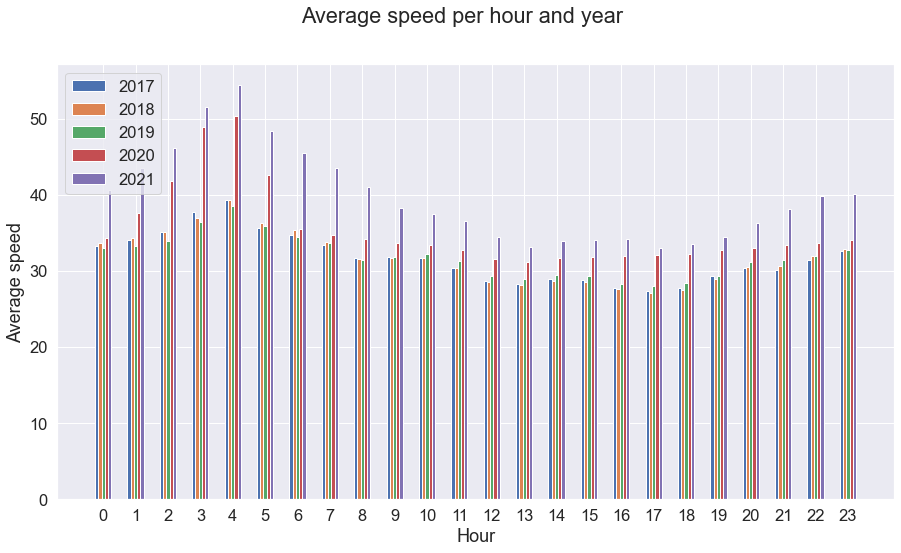

In [54]:
#(d) Plotting distributions per HOUR
sns.set(font_scale=1.5)

def get_avg_val_hour(Data_year, n_hours):
    avg_val = np.zeros(n_hours)
    for i in range(n_hours):
        speed_val = Data_year[Data_year[:, 0].astype(int) == i]
        avg_val[i] = np.average(speed_val[:, 1])
    return avg_val
    
def draw_bar_chart_hour(Data, x_days):
    years = np.unique(Data[:, col_year])#Getting the years
    n_years = len(years) #Number of years
    n_hours = 24 # Number of hours 
    X_axis = np.arange(n_hours)

    avg_day = np.zeros((n_years, n_hours))
    k = 0.1 #Bar width
    init_val = - 0.2

    for i in range(n_years):
        Speed_day = Data [Data[:, col_year].astype(float) == years[i]]
        Speed_day = Speed_day[:, [col_hour, col_speed]]
        avg_day[i] = get_avg_val_day(Speed_day, n_hours)

    
    #Drawing bar chart
    plt.figure(figsize=(15, 8))
    for i in range(n_years):    
        plt.bar(X_axis + init_val + k * i, avg_day[i], 0.1, label = years[i])

    plt.xticks(X_axis, range(n_hours))
    plt.xlabel("Hour")
    plt.ylabel("Average speed")
    plt.legend(loc='upper left')
    plt.suptitle('Average speed per hour and year')
    plt.show()
    
col_hour = 5
draw_bar_chart_hour(Data, [])

In [14]:
def plot_KNNC(Data, Labels, target_names):
    neigh = KNeighborsClassifier(n_neighbors=3)

    # Make a train/test split using 30% test size
    X_train, X_test, y_train, y_test = train_test_split(
        Data, Labels, test_size=0.30)
    neigh.fit(X_train, y_train)
    assigned_labels = neigh.predict(X_test)
    #print('AL: ', assigned_labels[0:10])
    #print('Xtest: ', X_test[0:10, [0,1]])
    #print('unique labels: ', target_names)
    e = np.mean(y_test != assigned_labels)
    conf_mat = confusion_matrix(y_test, assigned_labels)
    print('\n Confusion Matrix of K-nn:')
    print(conf_mat)
    print('K-nn accuracy: ', round(neigh.score(X_test, y_test),4))
    print('Error rate of K-nn - Hold-out protocol: ', round(e, 4))
    plt.figure(figsize=(10, 7))
    plt.plot(X_test[assigned_labels == 0,0],X_test[assigned_labels == 0,5],'r^')
    plt.plot(X_test[assigned_labels == 1,0],X_test[assigned_labels == 1,5],'go')
    plt.xlabel('Day')
    plt.ylabel('Speed')
    plt.legend(('Speed Invalid','Speed Valid'))
    plt.show()

def calculate_logistic_regression(Data, Labels):
    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(Data, Labels)
    #print('Classes: ', model.classes_)
    print('\nIntercept: ', model.intercept_)
    print('Model coefficients:')
    print(model.coef_)
    assigned_labels = model.predict(Data)
    #print('Model predic probabilities: ', model.predict_proba(Data[0:5]))
    #print('Model predictions:', model.predict(Data[0:5]))
    conf_mat = confusion_matrix(Labels, assigned_labels)
    error_rate = np.mean(Labels != assigned_labels)
    print('Confusion matrix:')
    print(conf_mat)
    print('Model accuracy: ', round(model.score(Data, Labels),4))
    print('Error rate - Logistic Regression: ', round(error_rate,4))

Headers:  ['Day' 'Day of Week' 'Detector ID' 'Month' 'Year' 'Hour' 'Minute'
 'Occupancy' 'Speed' 'Volume' 'Read Date Year' 'Read Date Month'
 'Read Date Day' 'Read Date Hour' 'Read Date Minute' 'Direction_NB'
 'Direction_SB' 'Lane_NB_in' 'Lane_NB_out' 'Lane_SB_in' 'Lane_SB_out'
 'Speed Validity']
(437900, 5)
(437900,)


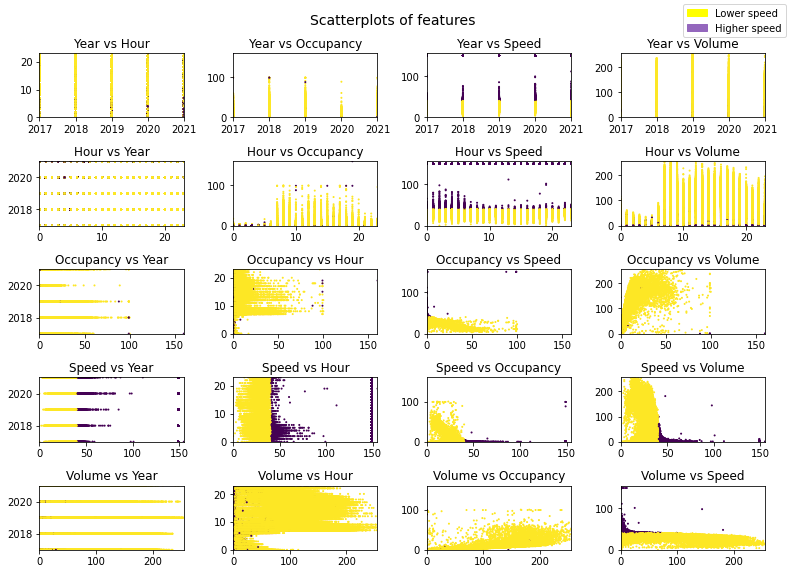

In [48]:
#Generate scatterplots
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
sns.reset_orig()

def plot_feature_class(Data, Labels):
    var_names = ['Year', 'Hour', 'Occupancy', 'Speed', 'Volume']
    figure = plt.figure(figsize = (11, 8))
    figure.suptitle('Scatterplots of features', fontsize=14)
    n = len(var_names)
    k = 1
    ax = []
    for j in range(n):
        for i in range(n):
            if i != j :
                ax = plt.subplot(n,n-1, k)
                plt.title('{0} vs {1}'.format(var_names[j], var_names[i]))
                plt.scatter(Data[:, j], Data[:, i], c = Labels, s=1)
                plt.axis('On')
                xmin = np.min(Data[:, j])
                xmax = np.max(Data[:, j])
                ymin = np.min(Data[:, i])
                ymax = np.max(Data[:, i])
                plt.xlim([xmin, xmax])
                plt.ylim([ymin, ymax])
                k += 1
    figure.tight_layout()
    figure.canvas.manager.set_window_title('Scatterplots of Traffic Dataset')
    yellow_patch = mpatches.Patch(color='yellow', label='Lower speed')
    purple_patch = mpatches.Patch(color='tab:purple', label='Higher speed')
    figure.legend(handles=[yellow_patch, purple_patch])
    plt.show()

print('Headers: ', df.columns.values)
sel_feat_df = df[['Year', 'Hour', 'Occupancy', 'Speed', 'Volume']]
Data = sel_feat_df.to_numpy()
print(Data.shape)
print(Labels.shape)
#['Year' 'Hour' 'Occupancy' 'Speed' 'Volume' 'Direction_SB']

plot_feature_class(Data, Labels) #First column contains intersection name

['Year' 'Hour' 'Occupancy' 'Volume']
[[2017    0    2   26]
 [2017    0    2   33]
 [2017    0    1   21]
 [2017    0    2   33]
 [2017    0    1   18]
 [2017    0    2   32]
 [2017    0    1   22]
 [2017    0    1   18]
 [2017    0    2   31]
 [2017    0    3   43]]

 Data:  (437900, 4)

 Labels:  (437900,)
Class=0, n=18186 (4.153%)
Class=1, n=419714 (95.847%)


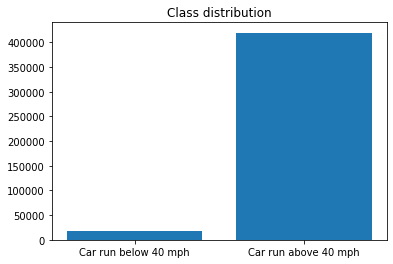

Counter({1: 167884, 0: 83942})
Class=0, n=83942 (33.333%)
Class=1, n=167884 (66.667%)


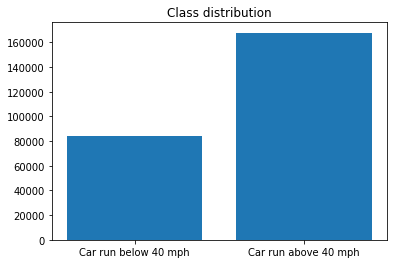



Train k-nn classifier with balanced Data

    Accuracy: 0.8555
 Sensitivity: 0.7870
 Specificity: 0.8896
      Recall: 0.7870
   Precision: 0.7799
          F1: 0.7834


In [53]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from math import sqrt

def plot_data(Data, Labels):
    plt.figure()
    plt.plot(Data[Labels == 0,:],Data[Labels == 0,:],'g.')
    plt.plot(Data[Labels == 1,:],Data[Labels == 1,:],'r.')
    plt.title('Balanced Data')
    plt.xlabel('Volume')
    plt.ylabel('Occupancy')
    plt.legend(('Class1','Class2'))
    plt.show()

def plot_class_distribution(Labels):
    Label_names = {'Car run below 40 mph', 'Car run above 40 mph'};
    n_objects = len(Labels)
    Animal_labels = np.ravel(Labels)
    Animal_labels = LabelEncoder().fit_transform(Animal_labels)
    Animal_labels = np.sort(Animal_labels)
    counter = Counter(Animal_labels)
    for k,v in counter.items():
        per = v / n_objects * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
    plt.bar(counter.keys(), counter.values())
    xticksLbl = list(counter.keys())
    plt.xticks(xticksLbl, Label_names)
    plt.title('Class distribution')
    plt.show()
    
def binary_performance_metrics(tl,al):
    accuracy = np.mean(tl == al)
    sensitivity = recall = np.sum((tl == 0) & (al == 0))/np.sum(tl == 0) 
    specificity = np.sum((tl == 1) & (al == 1))/np.sum(tl == 1)
    if np.sum(al == 0) == 0 :
        precision = 0
        F1 = 0
    else:    
        precision = np.sum((tl == 0) & (al == 0))/np.sum(al == 0)
        F1 = 2 * recall * precision / (recall + precision)
        
    return accuracy, sensitivity, specificity, recall, precision, F1

def SVM_classifier_imbalaced_data(Data, Labels, Test_Data, Test_Labels):
    clf = SVC()
    clf.fit(Data, Labels) #Train SVM classifier
    assigned_labels = clf.predict(Test_Data) 
    plot_classification_regions_SVM(clf, 'Classification Regions for SVM Classifier- Imbalanced data')
    metrics = binary_performance_metrics(Test_Labels, assigned_labels)
    return metrics

#Function to oversample class of interest and undersample majority class
def pre_processing_imbalanced_data(Data, Labels):
    # define pipeline
    plot_class_distribution(Labels)
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    Data, Labels = pipeline.fit_resample(Data, Labels)
    # summarize the new class distribution
    counter = Counter(Labels)
    print(counter)
    #plot_data(Data, Labels)
    plot_class_distribution(Labels)
    return Data, Labels

#Function to oversample class of interest
def oversample_minority_class(Data, Labels, Test_Data, Test_Labels):
    # Data 1
    N = len(Data)
    N1 = np.round(0.0415*N).astype(int)
    N2 = N - N1
    #Oversampling Data1
    Class1 = Data[Labels == 0] # Class of interest
    Class2 = Data[Labels == 1] 
    index_over = np.random.choice(N1, N2, replace = True)
    NewClass1 = Class1[index_over]; NewLabels1 = Labels[index_over]
    OverData1 = np.vstack((NewClass1, Class2))
    OverLabels1 = np.hstack((np.zeros(len(NewClass1)),np.ones(len(Class2))))
    
def SVM_classifier_balanced_data(X_train, y_train, X_test, y_test):
    clf = SVC()
    clf.fit(X_train, y_train)
    assigned_labels = clf.predict(X_test) 
    #plot_classification_regions_SVM(clf, 'Classification Regions for SVM Classifier - Balanced Data')
    metrics = binary_performance_metrics(y_test, assigned_labels)
    return metrics

def knn_classifier_balanced_data(X_train, y_train, X_test, y_test):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    assigned_labels = neigh.predict(X_test) 
    metrics = binary_performance_metrics(y_test, assigned_labels)
    return metrics

def decision_tree_classifier_balanced_data(X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    assigned_labels = clf.predict(X_test) 
    metrics = binary_performance_metrics(y_test, assigned_labels)
    return metrics

def LDC_classifier_balanced_data(X_train, y_train, X_test, y_test):
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    assigned_labels = clf.predict(X_test) 
    metrics = binary_performance_metrics(y_test, assigned_labels)
    return metrics

def random_forest_classifier_balanced_data(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    assigned_labels = clf.predict(X_test) 
    metrics = binary_performance_metrics(y_test, assigned_labels)
    return metrics

def logistic_regression_classifier_data(X_train, y_train, X_test, y_test):
    clf = LogisticRegression()
    # training the model
    clf.fit(X_train, y_train)
    assigned_labels = clf.predict(X_test)
    metrics = binary_performance_metrics(y_test, assigned_labels)
    return metrics
    

def print_metrics(metrics_val, title):
    metrics = ["Accuracy", "Sensitivity", "Specificity", "Recall", "Precision", "F1"]
    print(title)
    for i in range(len(metrics)):
        print('%12s: %.4f' % (metrics[i],metrics_val[i]))

def plot_classification_regions_SVM(svm_classifier, title):
    griddatax, griddatay = np.array(np.meshgrid(np.linspace(1,31,200), \
                       np.linspace(0,23,200)))
    griddata = np.hstack((np.reshape(griddatax,(-1,1)), \
                          np.reshape(griddatay,(-1,1))))
    grid_labels = svm_classifier.predict(griddata)
    plt.plot(griddata[grid_labels == 1,0],griddata[grid_labels == 1,1],'r.')
    plt.plot(griddata[grid_labels == 0,0],griddata[grid_labels == 0,1],'g.')
    plt.title(title) #'Classification Regions for SVM Classifier'
    plt.xlabel('Day')
    plt.ylabel('Hour')
    plt.legend(('Class1','Class2'))
    plt.show()


sel_feat_df = df[['Year', 'Hour', 'Occupancy', 'Volume']]
print(sel_feat_df.columns.values)
Data = sel_feat_df.to_numpy()

print(Data[0:10])
print('\n Data: ', Data.shape)
print('\n Labels: ', Labels.shape)
New_Data, New_Labels = pre_processing_imbalanced_data(Data, Labels)
X_train, X_test, y_train, y_test = train_test_split(New_Data, New_Labels, test_size=0.50)

metrics_val = SVM_classifier_balanced_data(X_train, y_train, X_test, y_test)
print_metrics(metrics_val, '\n\nTrain SVM with balanced Data\n')
metrics_val = knn_classifier_balanced_data(X_train, y_train, X_test, y_test)
print_metrics(metrics_val, '\n\nTrain k-nn classifier with balanced Data\n')
metrics_val = decision_tree_classifier_balanced_data(X_train, y_train, X_test, y_test)
print_metrics(metrics_val, '\n\nTrain Decision Tree classifier with balanced Data\n')
metrics_val = logistic_regression_classifier_data(X_train, y_train, X_test, y_test)
print_metrics(metrics_val, '\n\nTrain Logistic Regression classifier with balanced Data\n')


In [52]:
# Example of Gaussian PDF
from math import sqrt
from math import pi
from math import exp
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(Data):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*Data)]
    del(summaries[-1])
    return summaries

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

def naive_bayes_classifier_balanced_data(X_train, y_train, X_test, y_test):

    new_y_train = y_train.reshape((-1,1))
    Trn_Data = np.hstack((X_train, new_y_train))
    print(Trn_Data[0:10])
    # fit model
    model = summarize_by_class(Trn_Data)
    # predict the label
    n_objects, _ = X_test.shape
    assigned_labels = np.zeros(n_objects)
    for i in range(n_objects):
        assigned_labels[i] = predict(model, X_test[i])
    metrics = binary_performance_metrics(y_test, assigned_labels)
    
    return metrics

metrics_val = naive_bayes_classifier_balanced_data(X_train, y_train, X_test, y_test)
print_metrics(metrics_val, '\n\nTrain Naives Bayes classifier with balanced Data\n')
# Test Gaussian PDF

[[2019    2    0    5    0]
 [2018   12   12  147    1]
 [2021    7    0   13    1]
 [2021    8    0    0    0]
 [2018   18   13  168    1]
 [2020    1    0    0    0]
 [2019    0    1   20    1]
 [2018    4    0    6    0]
 [2021    9    0    0    0]
 [2018   22    2   42    1]]


Train Naives Bayes classifier with balanced Data

    Accuracy: 0.8180
 Sensitivity: 0.9679
 Specificity: 0.7428
      Recall: 0.9679
   Precision: 0.6536
          F1: 0.7803
